# Encoding
[Himanshu Goswami](https://github.com/HimGos) - October 2022

***I can't understand what is cat.*** - said the Machine Learning Algorithm.

A machine learning algorithm needs to be able to understand the data it receives

Often dataset contain categorical variables. These variables are typically stored as text values. Since machine learning is based on mathematical equations, it would cause a problem when we keep categorical variables as is.

Categorical features are generally divided into 3 types:
> **A.** **Binary** : Either/or
> Examples:
> - Yes, No
> - True, False
>
> **B.** **Ordinal** : Specific ordered Groups.
> Examples:
> - low, medium, high
> - cold, hot, lava Hot
>
> **C.** **Nominal** : Unordered Groups.
> Examples
> - cat, dog, tiger
> - pizza, burger, coke
>

To discover them, we will see the following ways to encode categorical variables:

***1. Label / Ordinal Encoding***
***2. One-hot/dummy Encoding***
***3. Target Encoding***
***4. Frequency / count Encoding***
***5. Binary Encoding***
***6. Feature Hashing***

In [1]:
# Importing Required Libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Loading Dataset

df =  pd.read_csv("data/Travel.csv")

df_orig = df.copy()

In [3]:
# checking dataset

df = df.drop('CustomerID', axis=1)
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Label / Ordinal Encoding

> - Label encoding algorithm is quite simple and it considers an order for encoding,
> - Hence can be used for encoding ordinal data.

In [4]:
# For Label encoding we will use ProductPitched feature

df['ProductPitched'].value_counts()

Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

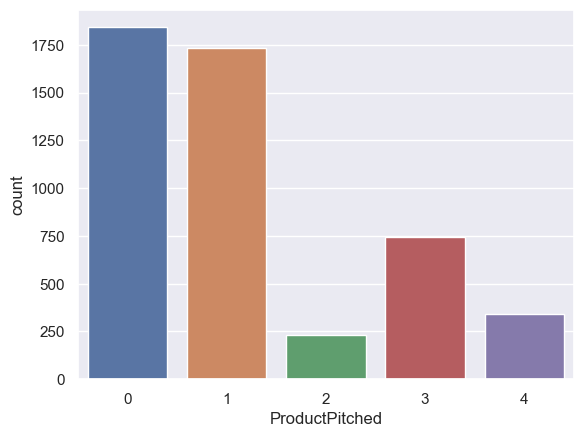

In [5]:
# Label Encoding using scikitlearn library

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['ProductPitched'] = le.fit_transform(df['ProductPitched'])

sns.set(style ="darkgrid")
sns.countplot(df['ProductPitched'])

In [6]:
df = df_orig.copy()

> #### Another Method

In [7]:
# Label encoding using category_encoder library

from category_encoders import OrdinalEncoder

mapping = [{'col': 'ProductPitched', 'mapping': {"Basic": 1,  "Standard": 2, "Deluxe": 3, "Super Deluxe": 4, "King": 5}}]
OrdinalEncoder(cols=['ProductPitched'], mapping=mapping).fit(df).transform(df)['ProductPitched'].head()

ordi = OrdinalEncoder(cols=['ProductPitched'], mapping=mapping).fit(df).transform(df)['ProductPitched']

ordi.head()

0    3
1    3
2    1
3    1
4    1
Name: ProductPitched, dtype: int32

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

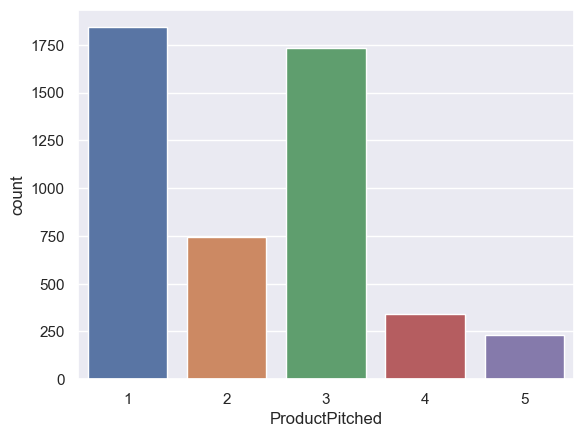

In [8]:
sns.set(style ="darkgrid")
sns.countplot(ordi)

> #### Observation
> - We noticed how Label Encoding changed our categorical variables to numbers.
> - ProductPitched column had 5 distinct datapoints and all of them were assigned a number ranging from 0-4.

## One-Hot / Dummy Encoding

> To overcome the Disadvantage of Label Encoding as it considers some hierarchy in the columns which can be misleading to nominal features present in the data. we can use the One-Hot Encoding strategy.
> In one-hot encoding, categorical data are represented as vectors of zeros and ones.
> This is done by using a separate dummy variable for each category, and setting the value of the dummy variable to 1 if the observation belongs to that category and 0 otherwise.

In [9]:
df = df_orig.copy()

> ##### One Hot using Sklearn library

In [10]:
# One-Hot encoding with Sklearn library

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

# transforming the column after fitting
enc = enc.fit_transform(df[['ProductPitched']]).toarray()

# converting arrays to a dataframe
encoded_colm = pd.DataFrame(enc)

# concatenating dataframes
df = pd.concat([df, encoded_colm], axis=1)

# removing the encoded column.
df = df.drop(['ProductPitched'], axis=1)

df[[0,1,2,3,4]].head(10)

,0,1,2,3,4
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0
9,0.0,1.0,0.0,0.0,0.0


In [11]:
df = df_orig.copy()

> ##### One-Hot using Pandas   (Preferable)

In [12]:
# One-Hot encoding with Pandas

df1 = pd.get_dummies(df, prefix=['ProductPitched'], columns=['ProductPitched'])
df1.iloc[: , -5:].head(10)

,ProductPitched_Basic,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe
0,0,1,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
5,1,0,0,0,0
6,1,0,0,0,0
7,1,0,0,0,0
8,0,0,0,1,0
9,0,1,0,0,0


In [13]:
df = df_orig.copy()

> ##### One-Hot using Category_Encoders

In [14]:
# One Hot using Category_Encoders library

from category_encoders import OneHotEncoder

onehot = OneHotEncoder(cols=['ProductPitched']).fit(df).transform(df)

onehot[['ProductPitched_1', 'ProductPitched_2', 'ProductPitched_3', 'ProductPitched_4', 'ProductPitched_5']].head()

,ProductPitched_1,ProductPitched_2,ProductPitched_3,ProductPitched_4,ProductPitched_5
0,1,0,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


> #### Observation :-
> - **Sklearn library** method created 5 colums named as 0,1,2,3,4 and encoded them as floating value
> - **Pandas** method seems to work best out of all since it named the columns in most recognizable way and used integer for encoding.
> - **Category_Encoders Library** also worked good in terms of encoding as integer but it didn't named the columns too properly like Pandas does.

## Target Encoding

> Target encoding is good because it picks up values that can explain the target.
>
> It is used by most kagglers in their competitions.
>
> The basic idea is to replace a categorical value with the mean of the target variable.

In [15]:
df = df_orig.copy()

>> #### Method 1

In [16]:
from category_encoders import TargetEncoder

Targetenc = TargetEncoder()

# transforming the column after fitting
values = Targetenc.fit_transform(X = df.ProductPitched, y = df.ProdTaken)

# concatenating values with dataframe
df = pd.concat([df, values], axis = 1)

df[['ProdTaken', 'ProductPitched']].head(10)

,ProdTaken,ProductPitched,ProductPitched
0,1,Deluxe,0.117783
1,0,Deluxe,0.117783
2,1,Basic,0.299674
3,0,Basic,0.299674
4,0,Basic,0.299674
5,0,Basic,0.299674
6,0,Basic,0.299674
7,0,Basic,0.299674
8,0,Standard,0.167116
9,0,Deluxe,0.117783


In [17]:
df = df_orig.copy()

>> #### Method 2

In [18]:
from category_encoders import TargetEncoder

targ = TargetEncoder(cols=['ProductPitched'], smoothing=1.0).fit(df, df['ProdTaken']).transform(df)

targ[['ProdTaken', 'ProductPitched']].head()

,ProdTaken,ProductPitched
0,1,0.117783
1,0,0.117783
2,1,0.299674
3,0,0.299674
4,0,0.299674


> #### Observations :-
> We perform Target encoding for train data only and code the test data using results obtained from the training dataset. Although, a very efficient coding system, it has the following issues responsible for deteriorating the model performance-
> - It can lead to target leakage or overfitting. To address overfitting we can use different techniques.
>   - In the leave one out encoding, the current target value is reduced from the overall mean of the target to avoid leakage.
>   - In another method, we may introduce some Gaussian noise in the target statistics. The value of this noise is hyperparameter to the model.
> - The second issue, we may face is the improper distribution of categories in train and test data. In such a case, the categories may assume extreme values. Therefore the target means for the category are mixed with the marginal mean of the target.

## Frequency / Count Encoding

> - Count encoding is a way of representing categorical data using the count of the categories.
> - Frequency encoding is simply a normalized version of count encoding.

In [19]:
# Retrieving original dataset

df = df_orig.copy()

In [20]:
# Count Encoding

from category_encoders import CountEncoder

count_enc = CountEncoder(cols=['ProductPitched']).fit(df).transform(df)

count_enc['ProductPitched'].head()

0    1732
1    1732
2    1842
3    1842
4    1842
Name: ProductPitched, dtype: int64

In [21]:
# Frequency Encoding

df = df_orig.copy()

from category_encoders import CountEncoder
freq_enc = CountEncoder(cols=['ProductPitched'], normalize=True).fit(df).transform(df)

freq_enc['ProductPitched'].head()

0    0.354337
1    0.354337
2    0.376841
3    0.376841
4    0.376841
Name: ProductPitched, dtype: float64

> #### Observation :-
> - Count Encoding converted the datapoints of the categorical column into their total count
> - Frequency shrunk them further within percentage count.

## Binary Encoding

> - Binary encoding is a combination of Hash encoding and one-hot encoding.
> - Binary encoding is a technique used to transform categorical data into numerical data by encoding categories as integers and then converting them into binary code.
> - Initially, categories are encoded as Integer and then converted into binary code, then the digits from that binary string are placed into separate columns.
> - This method is quite preferable when there is more categories. Imagine if you have 100 different categories. One hot encoding will create 100 different columns, But binary encoding only need 7 columns.

In [22]:
# Retrieving original dataset

df = df_orig.copy()

In [23]:
df['ProductPitched'].head()

0    Deluxe
1    Deluxe
2     Basic
3     Basic
4     Basic
Name: ProductPitched, dtype: object

>> #### Method 1

In [24]:
from category_encoders import BinaryEncoder
bin_enc = BinaryEncoder(cols=['ProductPitched']).fit(df).transform(df)

bin_enc[['ProductPitched_0', 'ProductPitched_1', 'ProductPitched_2']].head()

,ProductPitched_0,ProductPitched_1,ProductPitched_2
0,0,0,1
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0


>> #### Method 2

In [25]:
df = df_orig.copy()


from category_encoders import BinaryEncoder

encoder = BinaryEncoder(cols =['ProductPitched'])

# transforming the column after fitting
newdata = encoder.fit_transform(df['ProductPitched'])

# concatenating dataframe
df = pd.concat([df, newdata], axis = 1)

# dropping old column
df = df.drop(['ProductPitched'], axis = 1)

df.iloc[:,-3:].head()

,ProductPitched_0,ProductPitched_1,ProductPitched_2
0,0,0,1
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0


> #### Observation :-
> - Binary encoding is a memory-efficient encoding scheme as it uses fewer features than one-hot encoding.
> - Further, It reduces the curse of dimensionality for data with high cardinality.

## Hash Encoder

> - Hashing is the transformation of arbitrary size input in the form of a fixed-size value.
> - We use hashing algorithms to perform hashing operations i.e to generate the hash value of an input.
> - Further, hashing is a one-way process, in other words, one can not generate original input from the hash representation.
> - Just like one-hot encoding, the Hash encoder represents categorical features using the new dimensions.
> - Here, the user can fix the number of dimensions after transformation using n_component argument.

>> #### Method 1 : Using skykit library

In [26]:
df = df_orig.copy()

In [27]:
# Original column

df.ProductPitched.head()

0    Deluxe
1    Deluxe
2     Basic
3     Basic
4     Basic
Name: ProductPitched, dtype: object

In [28]:
from sklearn.feature_extraction import FeatureHasher

# n_features contains the number of bits you want in your hash value.
h = FeatureHasher(n_features = 3, input_type ='string')

# transforming the column after fitting
hashed_Feature = h.fit_transform(df['ProductPitched'])
hashed_Feature = hashed_Feature.toarray()

df = pd.concat([df, pd.DataFrame(hashed_Feature)], axis = 1)

df[[0,1,2]].head(10)


,0,1,2
0,0.0,3.0,3.0
1,0.0,3.0,3.0
2,-2.0,0.0,-1.0
3,-2.0,0.0,-1.0
4,-2.0,0.0,-1.0
5,-2.0,0.0,-1.0
6,-2.0,0.0,-1.0
7,-2.0,0.0,-1.0
8,-3.0,3.0,2.0
9,0.0,3.0,3.0


>> #### Method 2 : Using category_encoders

In [29]:
df = df_orig.copy()

In [30]:
from category_encoders import HashingEncoder

hash = HashingEncoder(cols=['ProductPitched']).fit(df).transform(df)

hash.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,CustomerID,ProdTaken,...,NumberOfFollowups,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,0,0,0,0,0,0,1,0,200000,1,...,3.0,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,0,0,0,0,0,1,0,200001,0,...,4.0,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,0,0,0,0,1,0,0,0,200002,1,...,4.0,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,0,0,0,1,0,0,0,200003,0,...,3.0,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,0,0,0,1,0,0,0,200004,0,...,3.0,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


> #### Observations :-
> - Since Hashing transforms the data in lesser dimensions, it may lead to loss of information. Another issue faced by hashing encoder is the collision.
> - Since here, a large number of features are depicted into lesser dimensions, hence multiple values can be represented by the same hash value, this is known as a collision.
> - Moreover, hashing encoders have been very successful in some Kaggle competitions. It is great to try if the dataset has high cardinality features.

------------------------------------------------------------------------

# Conclusion

To summarize, encoding categorical data is an unavoidable part of the feature engineering.

It is more important to know what coding scheme should we use. Having into consideration the dataset we are working with and the model we are going to use.

So, which one should you use?

It depends on the dataset, the model, and the performance metric you are trying to optimize. In general, **one-hot encoding** is the most commonly used method for nominal variables. It is simple to understand and implement, and it works well with most machine learning models. To fight the curse of dimensionality, **binary encoding** might be a good alternative to one-hot encoding because it creates fewer columns when encoding categorical variables.

**Ordinal encoding** is a good choice if the order of the categorical variables matters. For example, if we were predicting the price of a house, the label “small”, “medium”, and “large” would imply that a small house is cheaper than a medium house, which is cheaper than a large house. The label is easily reversible and doesn’t increase the dimensionality of the data.

On the other hand, the **target encoding** is a supervised encoder that captures information about the label and potentially predictive features. This encoder does not increase the dimensionality of the feature space, but can lead to overfitting and is prone to target leakage.

The **frequency and count encoders** are also supervised methods that do not increase the dimensionality of the feature space. However, these methods can only be used if the count refers to the target variable, otherwise, all categories that have similar cardinality will be counted the same.

The **feature hashing** is a good way to handle categorical variables when the cardinality is very high as it is fast to compute and does not grow in size when adding categories.